### CAS KAGGLE

#### Introducció

Guia 

1- introducció / llegir base de dades
2- data cleaning / preprocessament (tractar els nans, tractar els outliers)
3- Exploration data analisiy 

Per realitzar el nostre cas Kaggle hem triat el famòs dataset airbnb se la ciutat de Nova York. Aquest dataset descriu la llista d'activitats i mértiques dels airbn a la ciutat de New York al 2019. 

Es tractar un problema de regressió ja que el target serà predir el preu per nit del AirBnb.



In [85]:
#importem llibreries
import pandas as pd 
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
from matplotlib.ticker import ScalarFormatter

### 1. Exploratory Data Analysis

##### Anàl·lisis descriptiu



Primer de tot llegim el dataset. I és molt important veure les dades i examinar-les juntament amb els atributs del nostre dataset per entrendre-ls així serà més fàcil per preparar les dades per futurs anàl·lisis.  

In [86]:
df = pd.read_csv('dataset/AB_NYC_2019.csv')

print(f'El nombre de mostres son: {df.shape[0]}')
print(f"El nombre d'atributs son: {df.shape[1]}")

print(df.dtypes)

df.head



El nombre de mostres son: 48895
El nombre d'atributs son: 16
id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object


<bound method NDFrame.head of              id                                               name   host_id  \
0          2539                 Clean & quiet apt home by the park      2787   
1          2595                              Skylit Midtown Castle      2845   
2          3647                THE VILLAGE OF HARLEM....NEW YORK !      4632   
3          3831                    Cozy Entire Floor of Brownstone      4869   
4          5022   Entire Apt: Spacious Studio/Loft by central park      7192   
...         ...                                                ...       ...   
48890  36484665    Charming one bedroom - newly renovated rowhouse   8232441   
48891  36485057      Affordable room in Bushwick/East Williamsburg   6570630   
48892  36485431            Sunny Studio at Historical Neighborhood  23492952   
48893  36485609               43rd St. Time Square-cozy single bed  30985759   
48894  36487245  Trendy duplex in the very heart of Hell's Kitchen  68119814   

         

Com podem veur el nostre dataset té 48895 mostres, és a dir files. I després té 16 atributs. El target serà l'atribut price.

#### Descripció dels atributs: 
- id: identificador 
- name: nom de l'anunci
- host_id: id del host 
- neighbourhood_group: localització
- neighbourhood: barri 
- latitude: latitud
- longitude: longitud
- room_type: tipus d'apartament 
- price: preu en dolars (target)
- number_of_reviews: número de reviews
- last_review: data de l'ultima ressenya
- calculated_host_listings_count: número de apartamentos que tiene el anfitrion
- availability_365: número de dias que está disponible para reservar 



In [113]:
df.describe(percentiles=[0.1,0.25,0.5,0.75,0.9])

id       host_id      latitude     longitude         price  \
count  4.885800e+04  4.885800e+04  48858.000000  48858.000000  48858.000000   
mean   1.902335e+07  6.763169e+07     40.728941    -73.952170    152.740309   
std    1.098289e+07  7.862389e+07      0.054528      0.046159    240.232386   
min    2.539000e+03  2.438000e+03     40.499790    -74.244420      0.000000   
10%    3.496225e+06  2.027013e+06     40.667997    -73.996690     49.000000   
25%    9.475980e+06  7.818669e+06     40.690090    -73.983070     69.000000   
50%    1.969114e+07  3.079133e+07     40.723070    -73.955680    106.000000   
75%    2.915765e+07  1.074344e+08     40.763107    -73.936280    175.000000   
90%    3.399303e+07  2.128728e+08     40.804876    -73.907807    269.000000   
max    3.648724e+07  2.743213e+08     40.913060    -73.712990  10000.000000   

       minimum_nights  number_of_reviews  reviews_per_month  \
count    48858.000000       48858.000000       48858.000000   
mean         7.012444          23.273098           1.091124   
std         20.019757          44.549898           1.597270   
min          1.000000           0.000000           0.000000   
10%          1.000000           0.000000           0.000000   
25%          1.000000           1.000000           0.040000   
50%          3.000000           5.000000           0.370000   
75%          5.000000          24.000000           1.580000   
90%         28.000000          70.000000           3.250000   
max       1250.000000         629.000000          58.500000   

       calculated_host_listings_count  availability_365  
count                    48858.000000      48858.000000  
mean                         7.148369        112.801425  
std                         32.964600        131.610962  
min                          1.000000          0.000000  
10%                          1.000000          0.000000  
25%                          1.000000          0.000000  
50%                          1.000000         45.000000  
75%                          2.000000        227.000000  
90%                          5.000000        337.000000  
max                        327.000000        365.000000

Podem veure que la mitjana de preus és de 152.74 $ per nit. La mitajana de número de nits és 7. També sorprén que la mínima 'availability_365' és de 0, és a dir que no hi ha disponibilitat en cap dia del any. 

Eliminem files on el preu sigui 0 i la disponibilitat sigui 0 també ja que no té sentit i podria fer que el rendiment del nostre model empitjores. Son molt poques files per tant, les eliminem. 

In [120]:
df = df[(df['price'] != 0) | (df['availability_365'] != 0)]
df.shape

(48855, 16)

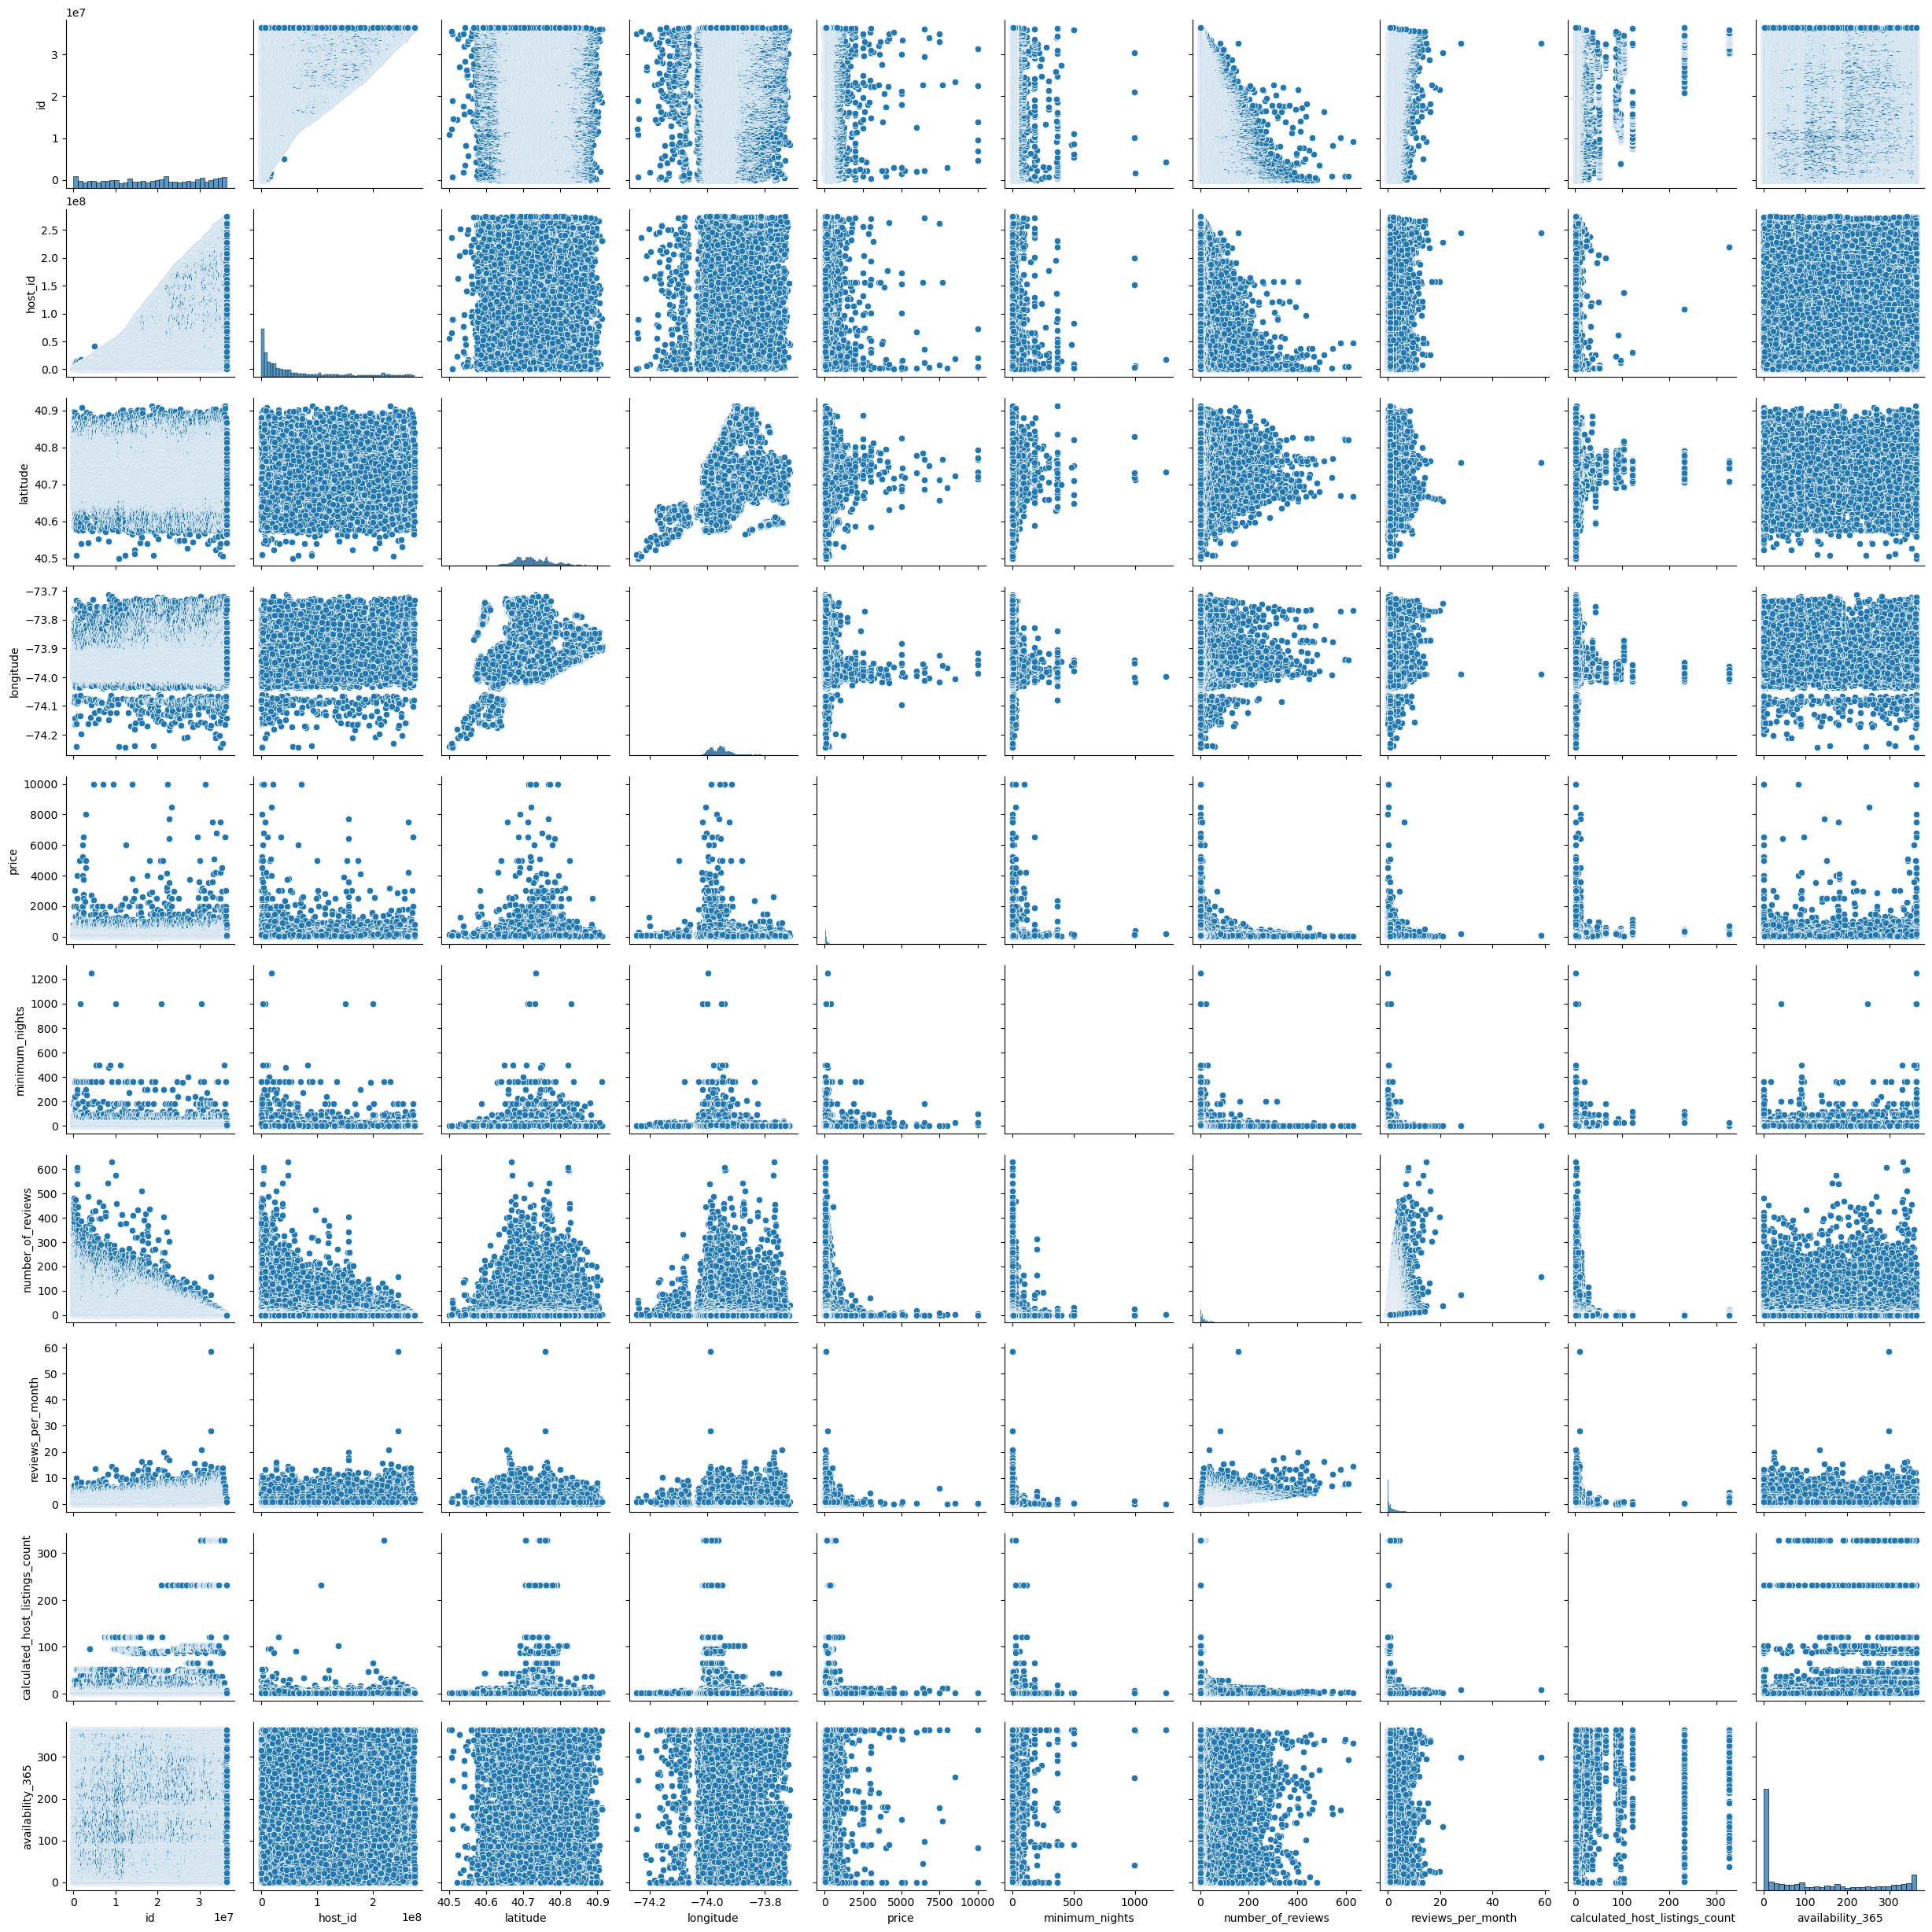

In [51]:
#### Basic plotting and visualization on the data set
sns.pairplot(df)
plt.show()

Anem  a veure la distribució de l'atribut target 

<Axes: ylabel='Density'>

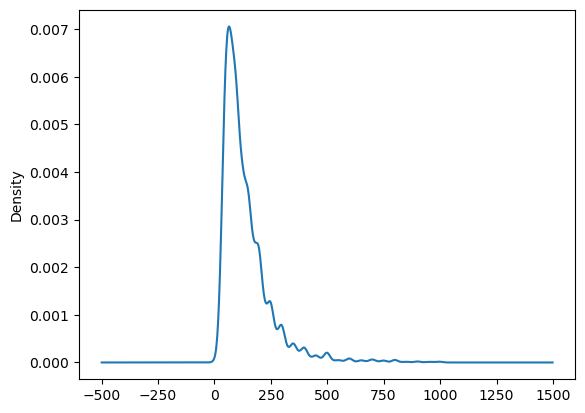

In [88]:
df[df['price'] < 1000]['price'].plot.density()

Text(0, 0.5, 'Nº AirBnb')

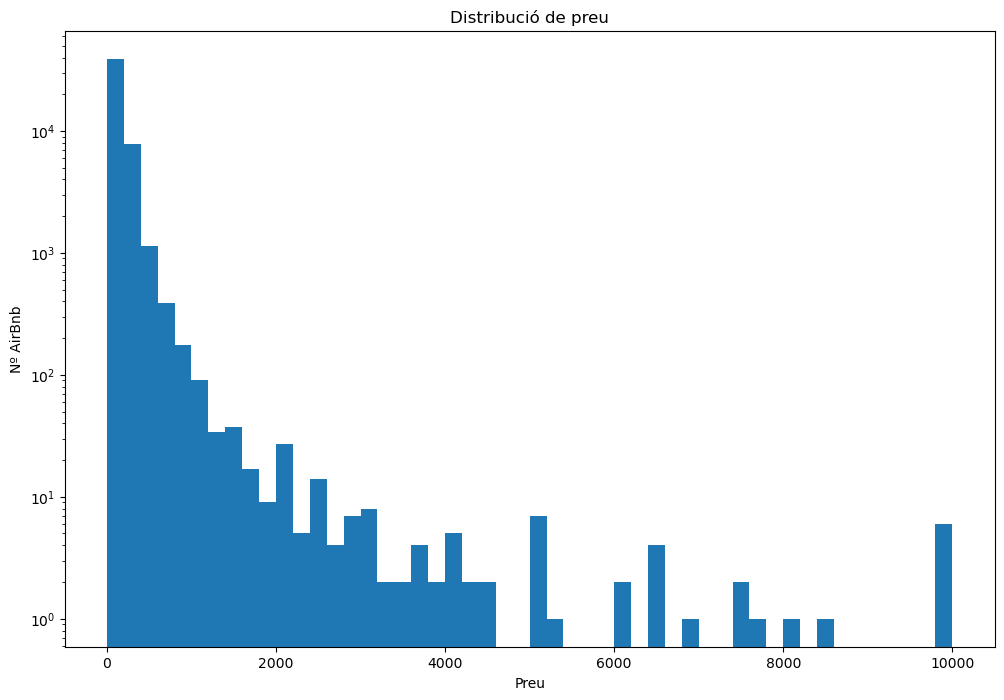

In [89]:
# Distribució del preu d'alquiler 
fig, ax = plt.subplots(figsize=(12,8))
ax.hist(df['price'], bins=50, log=True)
ax.set_title('Distribució de preu')
ax.set_xlabel('Preu')
ax.set_ylabel('Nº AirBnb')

#### Preprocessament i Data Cleaning 

##### Mirem si conté valors nuls

In [90]:
#numero de valores nulos en el dataset 
num_valors_null = df.isnull().sum()
percentatge_null = df.isnull().sum()/df.size

#percentatge valors nuls, per entendre millor 
print(percentatge_null)

#llistem els valors nuls
columna_null = df.columns[df.isnull().any()].to_list()
print(columna_null)


id                                0.000000
name                              0.000020
host_id                           0.000000
host_name                         0.000027
neighbourhood_group               0.000000
neighbourhood                     0.000000
latitude                          0.000000
longitude                         0.000000
room_type                         0.000000
price                             0.000000
minimum_nights                    0.000000
number_of_reviews                 0.000000
last_review                       0.012849
reviews_per_month                 0.012849
calculated_host_listings_count    0.000000
availability_365                  0.000000
dtype: float64
['name', 'host_name', 'last_review', 'reviews_per_month']


In [91]:
# número de valors nulls 
for valor in columna_null:
    print(df[valor].isnull().value_counts())

name
False    48879
True        16
Name: count, dtype: int64
host_name
False    48874
True        21
Name: count, dtype: int64
last_review
False    38843
True     10052
Name: count, dtype: int64
reviews_per_month
False    38843
True     10052
Name: count, dtype: int64


#### Remplaçament de valors nuls 

Les columnes 'name', 'host_name' tenen molt pocs nans. Per tant, la manera més fácil i sense afectar al model és eliminant les files que contenen els nans.  

Podem observar, que last_review i reviews_per_month estan connectats un amb l'altre. Els valors que falten representen que no s'ha deixat una ressenya per aquella anunci AirBnb. Basicament si no hi ha la data de ressenya tampoc estará el camp reviews_per_month (és un percentatge).
 - Les reviews_per_month replacarem els nans per una puntuació de 0.0, que indicarà que no hi ha ressenya.
 - La last_reviews_per_month per una data simbolica que sera l'última data possible '2019-12-31' 

In [92]:
#eliminem files amb nans 'name'
df.dropna(subset=['name'], inplace=True)

#eliminem files amb nans 'host_name'
df.dropna(subset=['host_name'], inplace=True)


In [93]:
#omplim reviews_per_month
df['reviews_per_month'] = df['reviews_per_month'].fillna(0.0)

#omplim last_reviews_per_month
df['last_review'] = df['last_review'].fillna("2019-12-31")

In [94]:
df.isnull().sum()/df.size

id                                0.0
name                              0.0
host_id                           0.0
host_name                         0.0
neighbourhood_group               0.0
neighbourhood                     0.0
latitude                          0.0
longitude                         0.0
room_type                         0.0
price                             0.0
minimum_nights                    0.0
number_of_reviews                 0.0
last_review                       0.0
reviews_per_month                 0.0
calculated_host_listings_count    0.0
availability_365                  0.0
dtype: float64

Podem veure com no queda cap nan.

##### Data Cleaning

Anem a eliminar els atributs que pel nostre model no són rellevants per calcular el target. També eliminant atributs redueix la possibilitat de overfitting. Els atributs a eliminar serán els seguents. 




In [121]:

df_new = df.drop(['name','host_name','last_review','id','host_id','number_of_reviews', 'last_review'],axis=1)
df_new.dtypes

neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

Per entendre millor realitzarem unes gràfiques per tal de visualitzar els atributs i fer-nos una idea. 

Mostrem la localització dels airbnb per barris

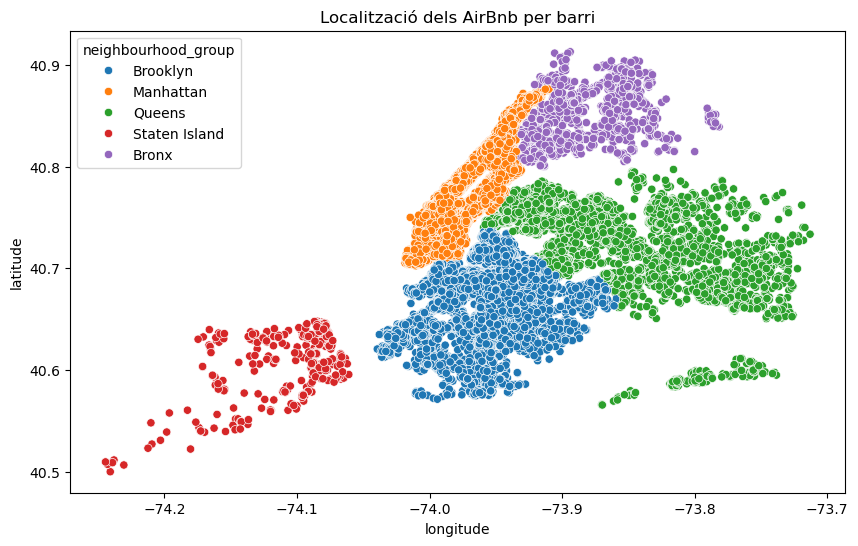

In [95]:
#farem un gràfic de punts 

title = 'Localització dels AirBnb per barri'
plt.figure(figsize=(10, 6))
sns.scatterplot(x='longitude', y='latitude', hue='neighbourhood_group', data=df).set_title(title)
plt.show()

Mirem districtes on hi ha més apartaments 


In [96]:
df.groupby(['neighbourhood_group','neighbourhood'])['neighbourhood'].count().reset_index(name='apt. count').sort_values('apt. count',ascending=False).head(10)


neighbourhood_group       neighbourhood  apt. count
93             Brooklyn        Williamsburg        3917
50             Brooklyn  Bedford-Stuyvesant        3713
105           Manhattan              Harlem        2655
58             Brooklyn            Bushwick        2462
124           Manhattan     Upper West Side        1969
106           Manhattan      Hell's Kitchen        1954
100           Manhattan        East Village        1852
123           Manhattan     Upper East Side        1797
65             Brooklyn       Crown Heights        1563
112           Manhattan             Midtown        1545

Distribució dels airbnb per barris i districtes

C:\Users\polvi\AppData\Local\Temp\ipykernel_46284\1253079244.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax1 = sns.barplot(data=neighbourhood_group,x='neighbourhood_group',y='count',ax=ax1, palette=color)
C:\Users\polvi\AppData\Local\Temp\ipykernel_46284\1253079244.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax2 = sns.barplot(data=neighbourhood.head(10),x='neighbourhood',y='count',ax=ax2, palette=color)
C:\Users\polvi\AppData\Local\Temp\ipykernel_46284\1253079244.py:12: UserWarning: 
The palette list has fewer values (5) than needed (10) and will cycle, which may produce an uninterpretable plot.
  ax2 = sns.barplot(data=neighbourhood.head(10),x='neighbourhood',y='count',ax=ax2, palette=color)
C:\

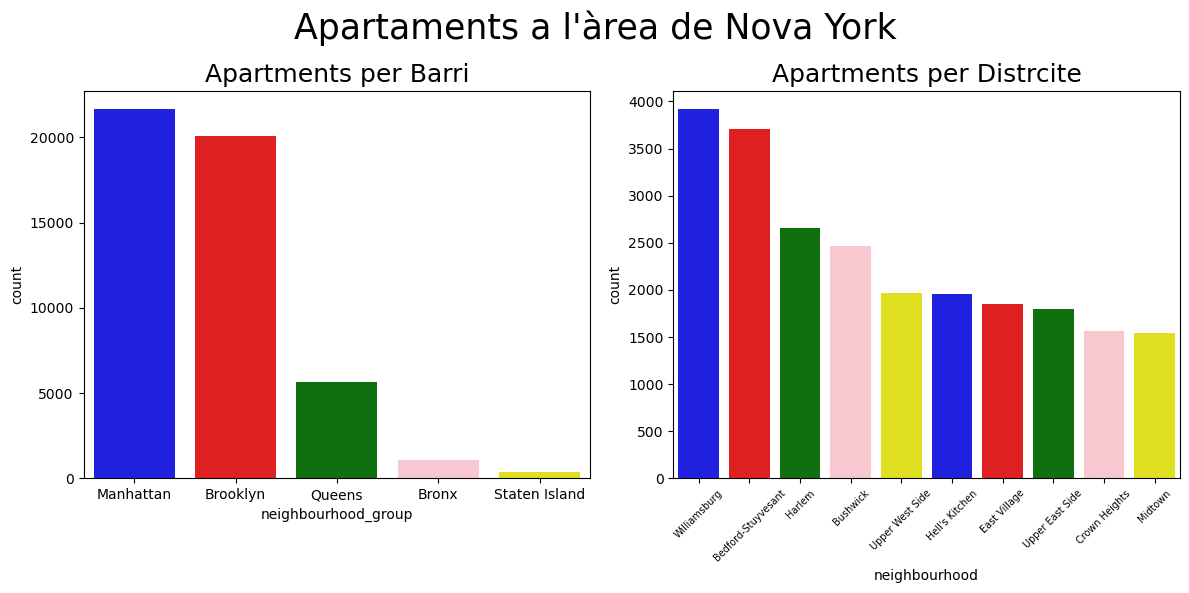

In [122]:
neighbourhood_group = df.groupby('neighbourhood_group')['neighbourhood_group'].count().reset_index(name='count').sort_values('count',ascending=False)

neighbourhood = df.groupby('neighbourhood')['neighbourhood'].count().reset_index(name='count').sort_values('count',ascending=False)

color = ['blue','red','green','pink','yellow']

fig,(ax1,ax2) = plt.subplots(ncols=2,figsize=(12,6))

ax1 = sns.barplot(data=neighbourhood_group,x='neighbourhood_group',y='count',ax=ax1, palette=color)
ax1.set_title('Apartments per Barri',size=18)

ax2 = sns.barplot(data=neighbourhood.head(10),x='neighbourhood',y='count',ax=ax2, palette=color)
ax2.set_xticklabels(ax2.get_xticklabels(),rotation=45,fontsize=7)
ax2.set_title('Apartments per Distrcite',size=18)

plt.suptitle("Apartaments a l'àrea de Nova York",size=25)

plt.tight_layout()

Distribució del tipus d'habitació i tipus d'habitació per barri  

C:\Users\polvi\AppData\Local\Temp\ipykernel_46284\3111150042.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='room_type', data=df, palette=['red','yellow','green'])


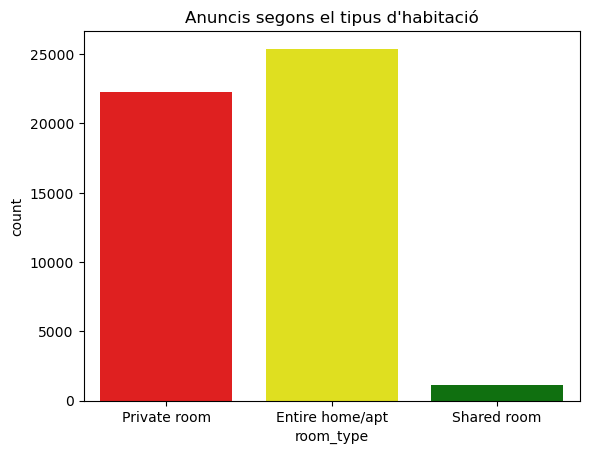

room_type
Entire home/apt    25393
Private room       22306
Shared room         1159
Name: count, dtype: int64


In [112]:
#preu dels anuncis segons tipus d'habitació 
title = "Anuncis segons el tipus d'habitació"
sns.countplot(x='room_type', data=df, palette=['red','yellow','green'])
plt.title(title)
plt.show()

print(df['room_type'].value_counts())

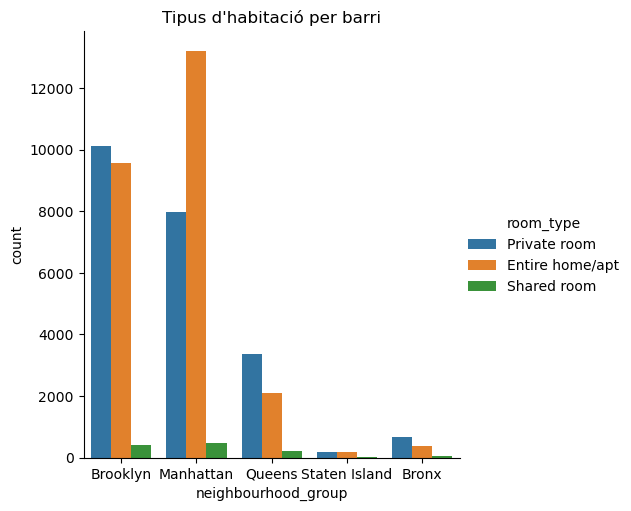

In [100]:
#classificació dels anuncis segons tipus d'habitació i barri 
title = "Tipus d'habitació per barri"
sns.catplot(x='neighbourhood_group', kind="count", hue="room_type", data=df)
plt.title(title)
plt.show()

Ara transformarem els atributs objectes en atributs numèrics ja que el l'entrenament del model només accepta atributs numèrics. Farem un label encoder dels atributs neighbourhood, neighbourhood_group
                    

In [103]:
from sklearn.preprocessing import LabelEncoder

#guardem els valors per després poder fer gàfiques
room_type_obj = df['room_type']

neighbourhood_obj = ['neighbourhood']


label_encoder = LabelEncoder()
df_new['neighbourhood'] = label_encoder.fit_transform(df_new['neighbourhood'])

label_encoder = LabelEncoder()
df_new['neighbourhood_group'] = label_encoder.fit_transform(df_new['neighbourhood_group'])

label_encoder = LabelEncoder()
df_new['room_type'] = label_encoder.fit_transform(df_new['room_type'])


print(df_new.dtypes)

neighbourhood_group                 int64
neighbourhood                       int64
latitude                          float64
longitude                         float64
room_type                           int64
price                               int64
minimum_nights                      int64
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object


CONCLUSIONS: 

Veiem la matriu de correlació entre les variables per veure quina relació hi ha entre les variables amb el target

In [104]:
df_new.corr()

neighbourhood_group  neighbourhood  latitude  \
neighbourhood_group                        1.000000       0.111289  0.279626   
neighbourhood                              0.111289       1.000000  0.234754   
latitude                                   0.279626       0.234754  1.000000   
longitude                                  0.101299      -0.102506  0.084819   
room_type                                 -0.016281      -0.071978  0.006270   
price                                      0.044188       0.062053  0.033944   
minimum_nights                             0.017397       0.028153  0.025893   
reviews_per_month                          0.052972      -0.051828 -0.018702   
calculated_host_listings_count             0.073669       0.010310  0.019548   
availability_365                           0.080626      -0.034440 -0.010775   

                                longitude  room_type     price  \
neighbourhood_group              0.101299  -0.016281  0.044188   
neighbourhood                   -0.102506  -0.071978  0.062053   
latitude                         0.084819   0.006270  0.033944   
longitude                        1.000000   0.184216 -0.149954   
room_type                        0.184216   1.000000 -0.249284   
price                           -0.149954  -0.249284  1.000000   
minimum_nights                  -0.062893  -0.070546  0.042804   
reviews_per_month                0.138759   0.026637 -0.050586   
calculated_host_listings_count  -0.114746  -0.106074  0.057460   
availability_365                 0.082754   0.022628  0.081817   

                                minimum_nights  reviews_per_month  \
neighbourhood_group                   0.017397           0.052972   
neighbourhood                         0.028153          -0.051828   
latitude                              0.025893          -0.018702   
longitude                            -0.062893           0.138759   
room_type                            -0.070546           0.026637   
price                                 0.042804          -0.050586   
minimum_nights                        1.000000          -0.127378   
reviews_per_month                    -0.127378           1.000000   
calculated_host_listings_count        0.131313          -0.047366   
availability_365                      0.145953           0.163751   

                                calculated_host_listings_count  \
neighbourhood_group                                   0.073669   
neighbourhood                                         0.010310   
latitude                                              0.019548   
longitude                                            -0.114746   
room_type                                            -0.106074   
price                                                 0.057460   
minimum_nights                                        0.131313   
reviews_per_month                                    -0.047366   
calculated_host_listings_count                        1.000000   
availability_365                                      0.225784   

                                availability_365  
neighbourhood_group                     0.080626  
neighbourhood                          -0.034440  
latitude                               -0.010775  
longitude                               0.082754  
room_type                               0.022628  
price                                   0.081817  
minimum_nights                          0.145953  
reviews_per_month                       0.163751  
calculated_host_listings_count          0.225784  
availability_365                        1.000000

<Axes: >

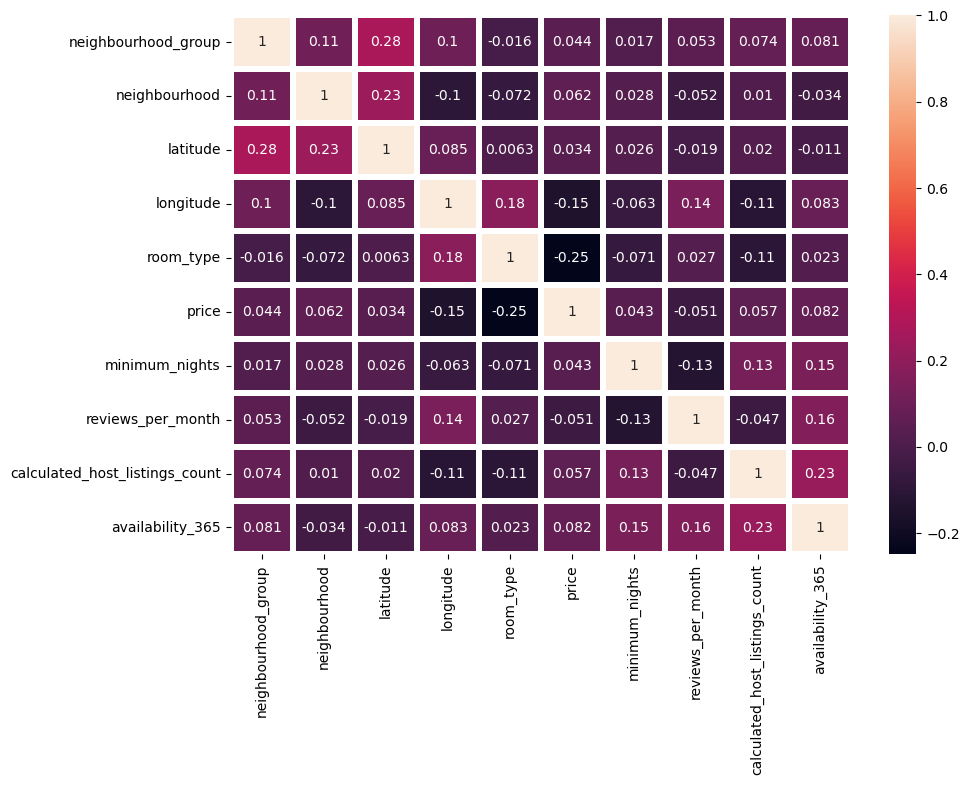

In [105]:
plt.figure(figsize=(10,7))
sns.heatmap(df_new.corr(),annot=True,linewidths=3)

In [106]:
def calcular_correlacio(data, target_column='target'):
    data_temp = data.copy()
    if data_temp[target_column].dtype == 'object':
        data_temp[target_column] = data_temp[target_column].map({'+': 1, '-': 0})
    le = LabelEncoder()
    for column in data_temp.columns:
        if data_temp[column].dtype == 'object' and column != target_column:
            data_temp[column] = le.fit_transform(data_temp[column])
    correlacions = data_temp.corr()[target_column]
    correlacions = correlacions.drop(target_column)
    return correlacions

correlacions = calcular_correlacio(df_new, target_column='price')
print(correlacions)

neighbourhood_group               0.044188
neighbourhood                     0.062053
latitude                          0.033944
longitude                        -0.149954
room_type                        -0.249284
minimum_nights                    0.042804
reviews_per_month                -0.050586
calculated_host_listings_count    0.057460
availability_365                  0.081817
Name: price, dtype: float64


C:\Users\polvi\AppData\Local\Temp\ipykernel_46284\932308209.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=correlacions.index, y=correlacions.values,  palette='viridis')


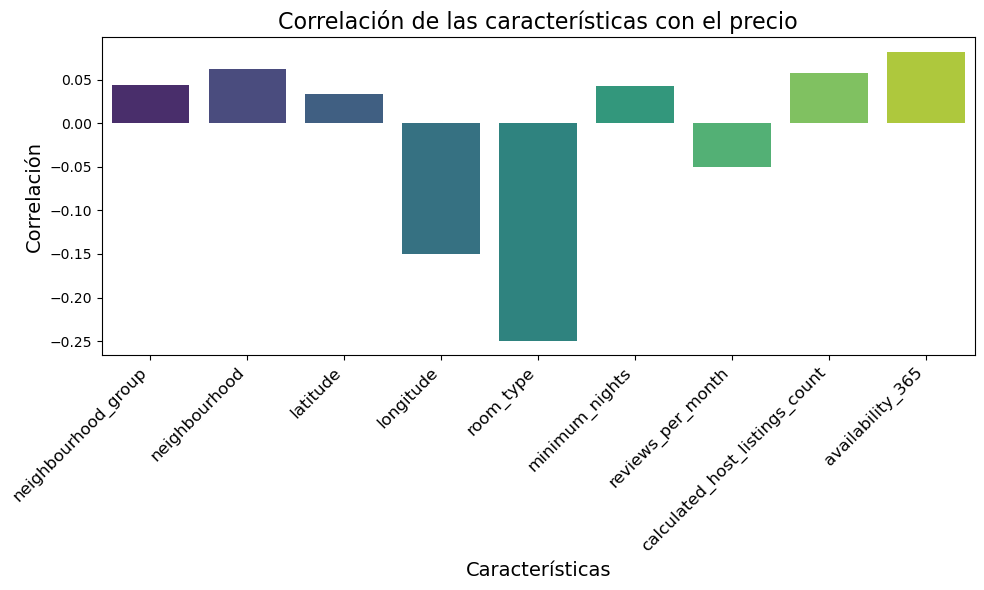

In [108]:
# Crear un gráfico de barras para visualizar las correlaciones
plt.figure(figsize=(10, 6))
sns.barplot(x=correlacions.index, y=correlacions.values,  palette='viridis')

# Añadir títulos y etiquetas
plt.title('Correlación de las características con el precio', fontsize=16)
plt.xlabel('Características', fontsize=14)
plt.ylabel('Correlación', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.tight_layout()

# Mostrar el gráfico
plt.show()

#### Visualitation

A partir de la matriu de correlació anem a extreure i graficar aquelles categories que més estan relacionades. 

Un cop vist la matriu de correlació de l'atribut target anem a analitzar el preu (que és l'atribut target) amb aquells atributs que tenen major correlació.

Fem distribució de preus per barris 

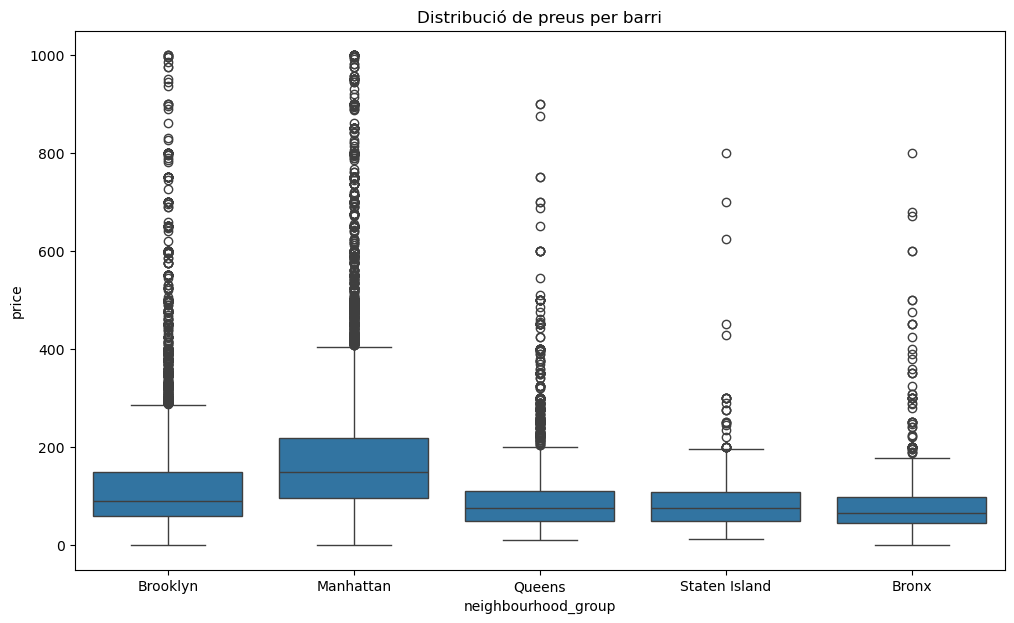

In [109]:
#fem gràfic de caixa per veure millors la distribució i també veure els valors que destaquen 
#gràfic de preu per cada barri per veure com es distribueixen

plt.figure(figsize=(12, 7))
sns.boxplot(x='neighbourhood_group', y='price', data=df[df['price'] < 1000])
plt.title("Distribució de preus per barri")
plt.show()

Anem a veure la correlació del 

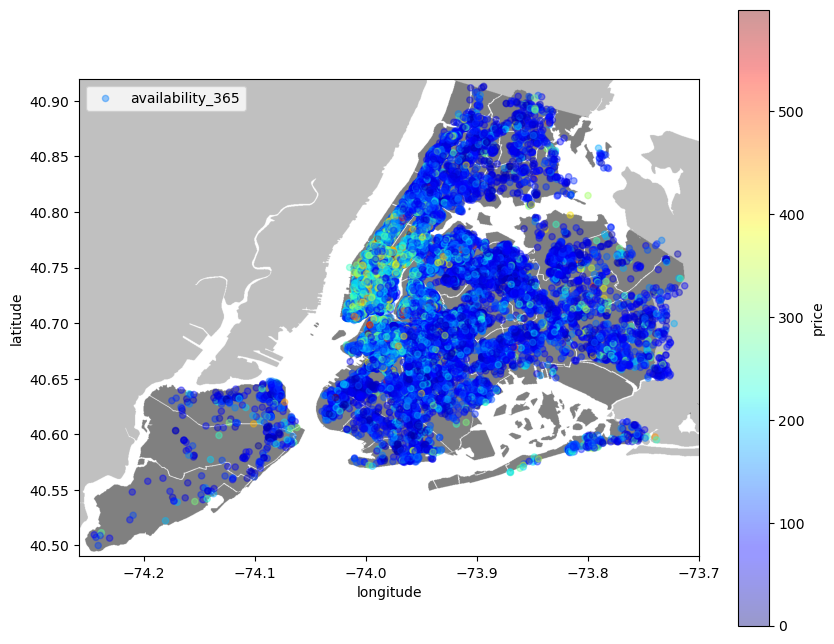

In [43]:
import urllib
from PIL import Image
import matplotlib.pyplot as plt

# Filtrar los datos
sub_6 = df[df.price < 600]

# Inicializar el tamaño de la figura
plt.figure(figsize=(10, 8))

# Cargar la imagen desde la URL usando PIL
url = 'https://upload.wikimedia.org/wikipedia/commons/e/ec/Neighbourhoods_New_York_City_Map.PNG'
with urllib.request.urlopen(url) as i:
    nyc_img = Image.open(i)

# Mostrar la imagen como fondo, ajustando las coordenadas
plt.imshow(nyc_img, zorder=0, extent=[-74.258, -73.7, 40.49, 40.92])

# Obtener el eje actual
ax = plt.gca()

# Graficar el scatterplot
sub_6.plot(
    kind='scatter', 
    x='longitude', 
    y='latitude', 
    label='availability_365', 
    c='price', 
    ax=ax, 
    cmap=plt.get_cmap('jet'), 
    colorbar=True, 
    alpha=0.4, 
    zorder=5
)

# Mostrar la leyenda y la gráfica
plt.legend()
plt.show()

Relació de preus segons tipus d'habitació 

C:\Users\polvi\AppData\Local\Temp\ipykernel_46284\3111150042.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='room_type', data=df, palette=['red','yellow','green'])


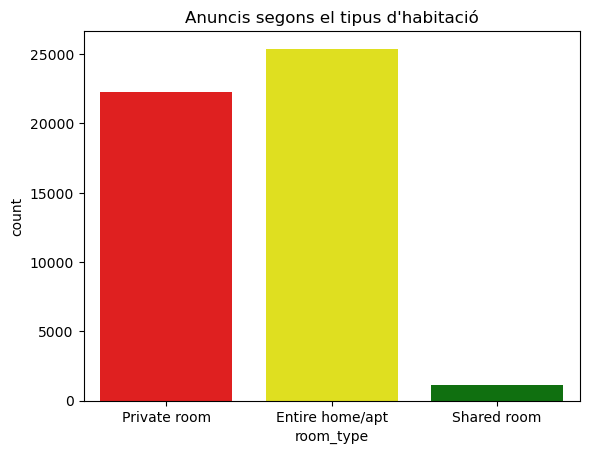

room_type
Entire home/apt    25393
Private room       22306
Shared room         1159
Name: count, dtype: int64
